In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import glob
from pathlib import Path

from skimage import color, exposure
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [44]:
pd.set_option('display.max_columns', None)

In [28]:
df = pd.read_csv('./Dane/final_train.csv',index_col='Unnamed: 0')

In [29]:
df.shape

(11086, 572)

In [30]:
df[['Activity', 'void()']].sample(10)

,Activity,void()
9661,WALKING_UPSTAIRS,2.0
2710,WALKING_DOWNSTAIRS,2.0
8121,WALKING,3.0
9776,SITTING,1.0
7563,SITTING,3.0
10167,WALKING_UPSTAIRS,2.0
10860,WALKING_UPSTAIRS,2.0
578,SITTING,3.0
10636,WALKING_UPSTAIRS,2.0
1525,WALKING_DOWNSTAIRS,1.0


In [32]:
df['Activity'].value_counts()

LAYING                2167
SITTING               2019
STANDING              1979
WALKING               1900
WALKING_UPSTAIRS      1633
WALKING_DOWNSTAIRS    1388
Name: Activity, dtype: int64

In [21]:
df['Activity'].unique()

array(['STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'SITTING',
       'WALKING_DOWNSTAIRS'], dtype=object)

In [35]:
df['void()']

array([ 1.,  2.,  3., nan])

In [45]:
df

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-49,56.1","fBodyAcc-bandsEnergy()-49,56.2","fBodyAcc-bandsEnergy()-49,64","fBodyAcc-bandsEnergy()-49,64.1","fBodyAcc-bandsEnergy()-49,64.2","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-57,64.1","fBodyAcc-bandsEnergy()-57,64.2","fBodyAcc-bandsEnergy()-9,16","fBodyAcc-bandsEnergy()-9,16.1","fBodyAcc-bandsEnergy()-9,16.2",fBodyAcc-energy()-X,fBodyAcc-energy()-Y,fBodyAcc-energy()-Z,fBodyAcc-entropy()-X,fBodyAcc-entropy()-Y,fBodyAcc-entropy()-Z,fBodyAcc-iqr()-X,fBodyAcc-iqr()-Y,fBodyAcc-iqr()-Z,fBodyAcc-kurtosis()-X,fBodyAcc-kurtosis()-Y,fBodyAcc-kurtosis()-Z,fBodyAcc-mad()-X,fBodyAcc-mad()-Y,fBodyAcc-mad()-Z,fBodyAcc-main()-X,fBodyAcc-main()-Y,fBodyAcc-main()-Z,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAcc-max()-Z,fBodyAcc-maxInds-X,fBodyAcc-maxInds-Y,fBodyAcc-maxInds-Z,fBodyAcc-mean()-X,fBodyAcc-mean()-Y,fBodyAcc-mean()-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,fBodyAcc-min()-X,fBodyAcc-min()-Y,fBodyAcc-min()-Z,fBodyAcc-skewness()-X,fBodyAcc-skewness()-Y,fBodyAcc-skewness()-Z,fBodyAcc-sma(),fBodyAcc-std()-X,fBodyAcc-std()-Y,fBodyAcc-std()-Z,"fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-1,16.1","fBodyAccJerk-bandsEnergy()-1,16.2","fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-1,24.1","fBodyAccJerk-bandsEnergy()-1,24.2","fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,8.1","fBodyAccJerk-bandsEnergy()-1,8.2","fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-17,24.1","fBodyAccJerk-bandsEnergy()-17,24.2","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-17,32.1","fBodyAccJerk-bandsEnergy()-17,32.2","fBodyAccJerk-bandsEnergy()-25,32","fBodyAccJerk-bandsEnergy()-25,32.1","fBodyAccJerk-bandsEnergy()-25,32.2","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-25,48.1","fBodyAccJerk-bandsEnergy()-25,48.2","fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-33,40.1","fBodyAccJerk-bandsEnergy()-33,40.2","fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-33,48.1","fBodyAccJerk-bandsEnergy()-33,48.2","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-41,48.1","fBodyAccJerk-bandsEnergy()-41,48.2","fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-49,56.1","fBodyAccJerk-bandsEnergy()-49,56.2","fBodyAccJerk-bandsEnergy()-49,64","fBodyAccJerk-bandsEnergy()-49,64.1","fBodyAccJerk-bandsEnergy()-49,64.2","fBodyAccJerk-bandsEnergy()-57,64","fBodyAccJerk-bandsEnergy()-57,64.1","fBodyAccJerk-bandsEnergy()-57,64.2","fBodyAccJerk-bandsEnergy()-9,16","fBodyAccJerk-bandsEnergy()-9,16.1","fBodyAccJerk-bandsEnergy()-9,16.2",fBodyAccJerk-energy()-X,fBodyAccJerk-energy()-Y,fBodyAccJerk-energy()-Z,fBodyAccJerk-entropy()-X,fBodyAccJerk-entropy()-Y,fBodyAccJerk-entropy()-Z,fBodyAc

In [47]:
tab = []
for it in df.index:
    tab.append(df.loc[it].isna().sum().sum())
#     print(it, df.loc[it].isna().sum().sum())

In [62]:
np.unique(np.array(tab), return_counts=True)

(array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40]),
 array([9624,    1,   37,   54,   40,   39,   40,   32,   42,   51,   42,
          41,   35,   41,   41,   37,   37,   42,   39,   31,   42,   43,
          44,   39,   33,   41,   48,   43,   42,   35,   49,   53,   55,
          54,   43,   37,   31,    8]))

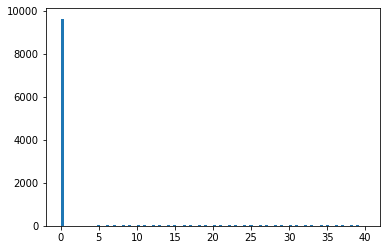

In [54]:
plt.hist(tab, bins=100);

In [109]:
df['Liczba bledow']=tab
df1 = df[df['Liczba bledow']<=5]

In [110]:
for col in df1.columns:
    print(col, df1[col].dtypes)
    if(df1[col].dtypes != object):
        df1[col] = df1[col].fillna((df[col].mean()))

Activity object
angle(X,gravityMean) float64
angle(Y,gravityMean) float64
angle(Z,gravityMean) float64
angle(tBodyAccJerkMean),gravityMean) float64
angle(tBodyAccMean,gravity) float64
angle(tBodyGyroJerkMean,gravityMean) float64
angle(tBodyGyroMean,gravityMean) float64
energy-mean() float64
fBodyAcc-bandsEnergy()-1,16 float64
fBodyAcc-bandsEnergy()-1,16.1 float64
fBodyAcc-bandsEnergy()-1,16.2 float64
fBodyAcc-bandsEnergy()-1,24 float64
fBodyAcc-bandsEnergy()-1,24.1 float64
fBodyAcc-bandsEnergy()-1,24.2 float64
fBodyAcc-bandsEnergy()-1,8 float64
fBodyAcc-bandsEnergy()-1,8.1 float64
fBodyAcc-bandsEnergy()-1,8.2 float64
fBodyAcc-bandsEnergy()-17,24 float64
fBodyAcc-bandsEnergy()-17,24.1 float64
fBodyAcc-bandsEnergy()-17,24.2 float64
fBodyAcc-bandsEnergy()-17,32 float64
fBodyAcc-bandsEnergy()-17,32.1 float64
fBodyAcc-bandsEnergy()-17,32.2 float64
fBodyAcc-bandsEnergy()-25,32 float64
fBodyAcc-bandsEnergy()-25,32.1 float64
fBodyAcc-bandsEnergy()-25,32.2 float64
fBodyAcc-bandsEnergy()-25,48 f

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


 float64
fBodyAccMag-meanFreq() float64
fBodyAccMag-min() float64
fBodyAccMag-skewness() float64
fBodyAccMag-sma() float64
fBodyAccMag-std() float64
fBodyBodyAccJerkMag-energy() float64
fBodyBodyAccJerkMag-entropy() float64
fBodyBodyAccJerkMag-iqr() float64
fBodyBodyAccJerkMag-kurtosis() float64
fBodyBodyAccJerkMag-mad() float64
fBodyBodyAccJerkMag-max() float64
fBodyBodyAccJerkMag-maxInds float64
fBodyBodyAccJerkMag-mean() float64
fBodyBodyAccJerkMag-meanFreq() float64
fBodyBodyAccJerkMag-min() float64
fBodyBodyAccJerkMag-skewness() float64
fBodyBodyAccJerkMag-sma() float64
fBodyBodyAccJerkMag-std() float64
fBodyBodyGyroJerkMag-energy() float64
fBodyBodyGyroJerkMag-entropy() float64
fBodyBodyGyroJerkMag-iqr() float64
fBodyBodyGyroJerkMag-kurtosis() float64
fBodyBodyGyroJerkMag-mad() float64
fBodyBodyGyroJerkMag-max() float64
fBodyBodyGyroJerkMag-maxInds float64
fBodyBodyGyroJerkMag-mean() float64
fBodyBodyGyroJerkMag-meanFreq() float64
fBodyBodyGyroJerkMag-min() float64
fBodyBodyGyroJ

tGravityAcc-entropy()-Y float64
tGravityAcc-entropy()-Z float64
tGravityAcc-iqr()-X float64
tGravityAcc-iqr()-Y float64
tGravityAcc-iqr()-Z float64
tGravityAcc-mad()-X float64
tGravityAcc-mad()-Y float64
tGravityAcc-mad()-Z float64
tGravityAcc-max()-X float64
tGravityAcc-max()-Y float64
tGravityAcc-max()-Z float64
tGravityAcc-mean()-X float64
tGravityAcc-mean()-Y float64
tGravityAcc-mean()-Z float64
tGravityAcc-min()-X float64
tGravityAcc-min()-Y float64
tGravityAcc-min()-Z float64
tGravityAcc-sma() float64
tGravityAcc-std()-X float64
tGravityAcc-std()-Y float64
tGravityAcc-std()-Z float64
tGravityAccMag-arCoeff()1 float64
tGravityAccMag-arCoeff()2 float64
tGravityAccMag-arCoeff()3 float64
tGravityAccMag-arCoeff()4 float64
tGravityAccMag-energy() float64
tGravityAccMag-entropy() float64
tGravityAccMag-iqr() float64
tGravityAccMag-mad() float64
tGravityAccMag-max() float64
tGravityAccMag-mean() float64
tGravityAccMag-min() float64
tGravityAccMag-sma() float64
tGravityAccMag-std() float6

In [111]:
for col in df1.columns:
    print(col, df1[col].dtypes)
    if(df1[col].dtypes == 'float64'):
        df1[col] = df1[col].astype('float32')

Activity object
angle(X,gravityMean) float64
angle(Y,gravityMean) float64
angle(Z,gravityMean) float64
angle(tBodyAccJerkMean),gravityMean) float64
angle(tBodyAccMean,gravity) float64
angle(tBodyGyroJerkMean,gravityMean) float64
angle(tBodyGyroMean,gravityMean) float64
energy-mean() float64
fBodyAcc-bandsEnergy()-1,16 float64
fBodyAcc-bandsEnergy()-1,16.1 float64
fBodyAcc-bandsEnergy()-1,16.2 float64
fBodyAcc-bandsEnergy()-1,24 float64
fBodyAcc-bandsEnergy()-1,24.1 float64
fBodyAcc-bandsEnergy()-1,24.2 float64
fBodyAcc-bandsEnergy()-1,8 float64
fBodyAcc-bandsEnergy()-1,8.1 float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


fBodyAcc-bandsEnergy()-1,8.2 float64
fBodyAcc-bandsEnergy()-17,24 float64
fBodyAcc-bandsEnergy()-17,24.1 float64
fBodyAcc-bandsEnergy()-17,24.2 float64
fBodyAcc-bandsEnergy()-17,32 float64
fBodyAcc-bandsEnergy()-17,32.1 float64
fBodyAcc-bandsEnergy()-17,32.2 float64
fBodyAcc-bandsEnergy()-25,32 float64
fBodyAcc-bandsEnergy()-25,32.1 float64
fBodyAcc-bandsEnergy()-25,32.2 float64
fBodyAcc-bandsEnergy()-25,48 float64
fBodyAcc-bandsEnergy()-25,48.1 float64
fBodyAcc-bandsEnergy()-25,48.2 float64
fBodyAcc-bandsEnergy()-33,40 float64
fBodyAcc-bandsEnergy()-33,40.1 float64
fBodyAcc-bandsEnergy()-33,40.2 float64
fBodyAcc-bandsEnergy()-33,48 float64
fBodyAcc-bandsEnergy()-33,48.1 float64
fBodyAcc-bandsEnergy()-33,48.2 float64
fBodyAcc-bandsEnergy()-41,48 float64
fBodyAcc-bandsEnergy()-41,48.1 float64
fBodyAcc-bandsEnergy()-41,48.2 float64
fBodyAcc-bandsEnergy()-49,56 float64
fBodyAcc-bandsEnergy()-49,56.1 float64
fBodyAcc-bandsEnergy()-49,56.2 float64
fBodyAcc-bandsEnergy()-49,64 float64
fBodyA

fBodyGyro-energy()-X float64
fBodyGyro-energy()-Y float64
fBodyGyro-energy()-Z float64
fBodyGyro-entropy()-X float64
fBodyGyro-entropy()-Y float64
fBodyGyro-entropy()-Z float64
fBodyGyro-iqr()-X float64
fBodyGyro-iqr()-Y float64
fBodyGyro-iqr()-Z float64
fBodyGyro-kurtosis()-X float64
fBodyGyro-kurtosis()-Y float64
fBodyGyro-kurtosis()-Z float64
fBodyGyro-mad()-X float64
fBodyGyro-mad()-Y float64
fBodyGyro-mad()-Z float64
fBodyGyro-max()-X float64
fBodyGyro-max()-Y float64
fBodyGyro-max()-Z float64
fBodyGyro-maxInds-X float64
fBodyGyro-maxInds-Y float64
fBodyGyro-maxInds-Z float64
fBodyGyro-mean()-X float64
fBodyGyro-mean()-Y float64
fBodyGyro-mean()-Z float64
fBodyGyro-meanFreq()-X float64
fBodyGyro-meanFreq()-Y float64
fBodyGyro-meanFreq()-Z float64
fBodyGyro-min()-X float64
fBodyGyro-min()-Y float64
fBodyGyro-min()-Z float64
fBodyGyro-skewness()-X float64
fBodyGyro-skewness()-Y float64
fBodyGyro-skewness()-Z float64
fBodyGyro-sma() float64
fBodyGyro-std()-X float64
fBodyGyro-std()-Y

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9662 entries, 0 to 11085
Columns: 573 entries, Activity to Liczba bledow
dtypes: float32(570), int64(2), object(1)
memory usage: 21.3+ MB


In [113]:
df1.isna().sum().sum()

0

In [115]:
df1.to_csv('df_bezNAN.csv')